## Inverse CDF mapping

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from neurodyn import *
import numpy as np
import matplotlib.pyplot as plt, matplotlib.colors as mplcolors
import scipy.stats as stats

In [21]:
def phi(z):
	return sigmoid(z)

z0 = np.random.default_rng(42).normal(loc=0, scale=1, size=1_000_000)
phi_z0 = phi(z0)
a, c = np.mean(phi_z0), np.var(phi_z0)

def phi_tilde(z):
	return (phi(z) - a) / c

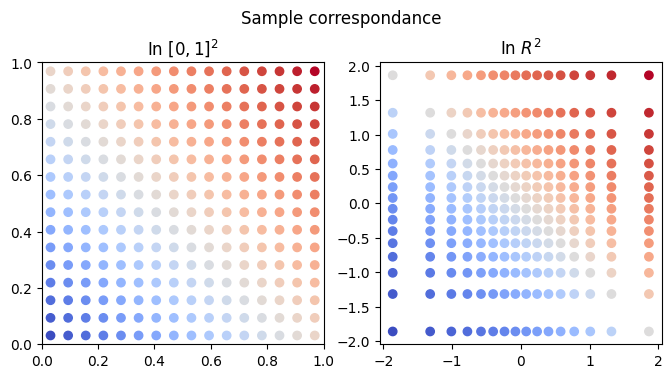

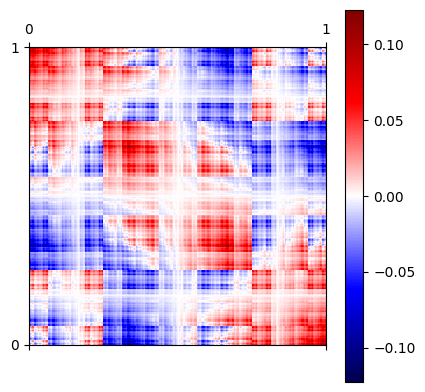

In [22]:
mapping = RecursiveLocalMapping(nrec=4)
Y = mapping.inverse_samples()
Z = stats.norm.ppf(Y)
F = stats.norm.ppf(Y)
G = phi_tilde(stats.norm.ppf(Y))

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].scatter(*Y.T, c=fake_activity(Y), cmap='coolwarm')
axes[1].scatter(*Z.T, c=fake_activity(Z), cmap='coolwarm')
axes[0].set_xlim((0,1))
axes[0].set_ylim((0,1))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
axes[0].set_title('In $[0,1]^2$')
axes[1].set_title('In $R^2$')
fig.suptitle('Sample correspondance')
plt.show()

J = np.einsum('am,bm->ab', F, G) / len(F)
plt.matshow(J, cmap='seismic', norm=mplcolors.TwoSlopeNorm(vcenter=0.0), extent=((0,1,0,1)));
plt.colorbar();
plt.show()

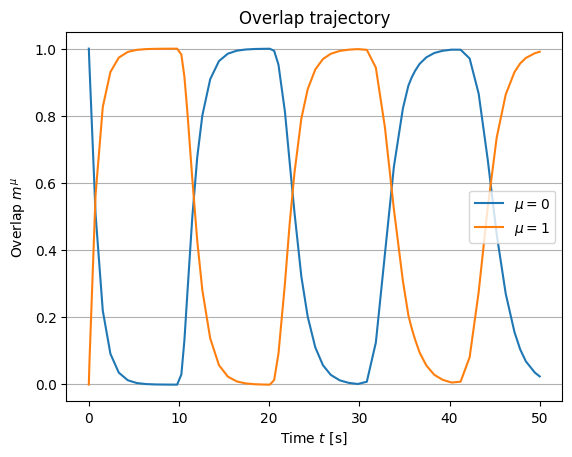

In [29]:
nrec = 5
nfrac = 2*nrec
mapping = RecursiveLocalMapping(nrec=nfrac)
Z = stats.norm.ppf(mapping.inverse_samples())
F = Z
G = phi_tilde(Z)
F_avg = F.reshape((2**nfrac, 2**nfrac, 2)).mean(axis=1)
G_avg = G.reshape((2**nfrac, 2**nfrac, 2)).mean(axis=1)

rnn = LowRankCyclingRNN(LowRankCyclingRNNParams(phi=sigmoid, I_ext=zero, exclude_self_connections=False, F=F_avg, G=G_avg, delta=10, shift=1))
res = rnn.simulate(rnn.F[:, 0], t_span=(0,50), dt_max=1)
plot_overlap_trajectory(rnn, res);

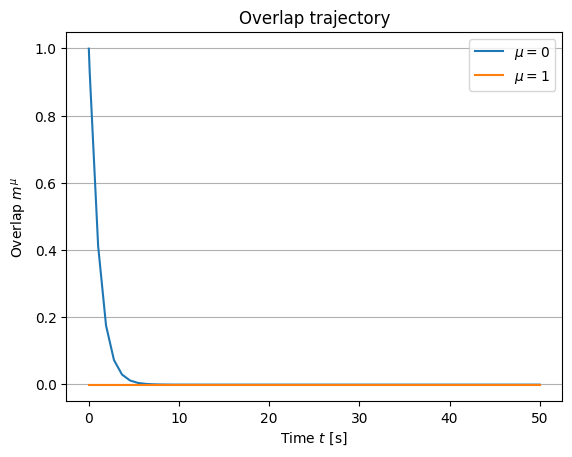

In [30]:
nrec = 5
nfrac = 2*nrec
mapping = ReshapeMapping(nx=2**nfrac, ny=2**nfrac)
Z = stats.norm.ppf(mapping.inverse_samples())
F = Z
G = phi_tilde(Z)
F_avg = F.reshape((2**nfrac, 2**nfrac, 2)).mean(axis=1)
G_avg = G.reshape((2**nfrac, 2**nfrac, 2)).mean(axis=1)

rnn = LowRankCyclingRNN(LowRankCyclingRNNParams(phi=sigmoid, I_ext=zero, exclude_self_connections=False, F=F_avg, G=G_avg, delta=10, shift=1))
res = rnn.simulate(rnn.F[:, 0], t_span=(0,50), dt_max=1)
plot_overlap_trajectory(rnn, res);